<a href="https://colab.research.google.com/github/Misudhari/Market-Segmentation/blob/main/Market_Segmentation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Market Segmentation - Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Market Segmentation/Train.csv')
print(df.head())

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  


In [4]:
print(df.columns)

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None


##Dataframe.info()
This function gives us Idea about what are the important information about the columns/features in the dataset wrt. data types.

In [6]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


##Dataframe.Describe()
This function considers all the numerical values as mean, std daviation, min, max are calculated based on Numeric data

##In Data Analysis What all things we do
1. Missing Values
2. Explore about the Numerical Variables
3. Explore about categorical variables
4. Finding relation between the features.

In [7]:
print(df.isnull().sum())

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


##Missing Values
From above we can understand that following columns have missing values: -<br>
Ever_Married - 140<br>
Graduated - 78<br>
Proffession - 124<br>
Work_Experience - 829<br>
Family_Size - 335<br>
Var_1 - 76

In [8]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Ever_Married',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Family_Size',
 'Var_1']

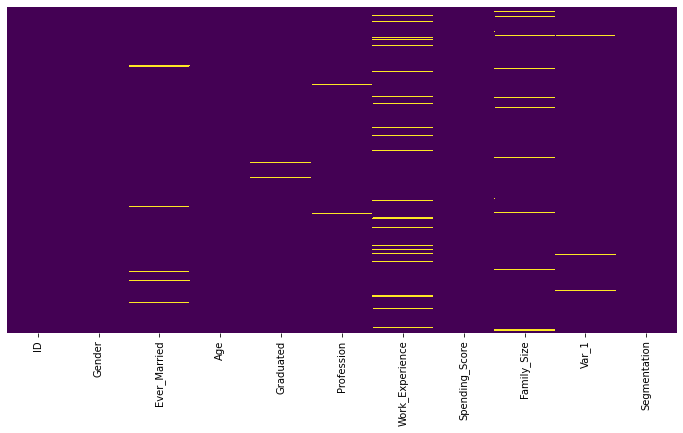

In [9]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

##Observations


In [10]:
# pd.merge is used to combine 2 dataframes. Also joins can be used in this function.
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [11]:
df.Profession.value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [12]:
Professions = df.Profession.value_counts().index

In [14]:
Prof_count = df.Profession.value_counts().values

([<matplotlib.patches.Wedge at 0x7f28d9af4250>,
 [Text(0.5989569701268878, 0.922632401304235, 'Artist'),
  Text(-0.8921634653749716, 0.6434627814024073, 'Healthcare'),
  Text(-1.0580011731220484, -0.3010540112211916, 'Entertainment'),
  Text(-0.6585403041641957, -0.8810928826130244, 'Engineer'),
  Text(-0.10251421126364135, -1.0952126900693735, 'Doctor'),
  Text(0.45368065771718363, -1.0020847573001517, 'Lawyer'),
  Text(0.8673651217808038, -0.6765188434317048, 'Executive'),
  Text(1.0475513952527535, -0.3356129829193282, 'Marketing'),
  Text(1.0947987168761302, -0.10684460457308673, 'Homemaker')],
 [Text(0.3267038018873933, 0.5032540370750371, '31.67%'),
  Text(-0.48663461747725717, 0.35097969894676756, '16.77%'),
  Text(-0.5770915489756627, -0.16421127884792266, '11.95%'),
  Text(-0.3592038022713795, -0.4805961177889223, '8.80%'),
  Text(-0.05591684250744073, -0.59738874003784, '8.66%'),
  Text(0.2474621769366456, -0.5465916858000827, '7.84%'),
  Text(0.47310824824407477, -0.36901027

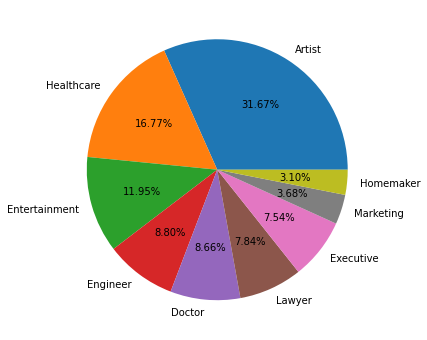

In [15]:
plt.pie(Prof_count, labels=Professions, autopct="%1.2f%%")

##Observations
1. We can See that Artist, Healthcare and Entertainment are top 3 professions.
2. Homemaker and Marketing are least prefered professions.

In [16]:
Gdata = df.groupby(['Profession', 'Gender']).size().reset_index().rename(columns={0:'No. of People'})

In [17]:
SegXProf = df.groupby(['Profession', 'Segmentation']).size().reset_index().rename(columns={0:'No of People'})

In [18]:
SegXProf

,Profession,Segmentation,No of People
0,Artist,A,558
1,Artist,B,756
2,Artist,C,1065
3,Artist,D,137
4,Doctor,A,199
5,Doctor,B,143
6,Doctor,C,140
7,Doctor,D,206
8,Engineer,A,259
9,Engineer,B,189


In [19]:
segdata = df.groupby(['Segmentation']).size().reset_index().rename(columns={0:'No of People'})

In [20]:
segdata

,Segmentation,No of People
0,A,1972
1,B,1858
2,C,1970
3,D,2268


##Observations
1. Max people are from segment D and Least are from B.
2. Max Artists are from segment C and least from segment D.
3. As we can see Max number of doctors are from segment D as well as max healthcare jobs are also in segment D.
4. Although segment C has most of the artists, yet it has least professionals from entertainment industry.

In [21]:
Spend_score = df.groupby(['Spending_Score', 'Profession']).size().reset_index().rename(columns={0:'Records'})
Spend_score['Spending_Score']

0     Average
1     Average
2     Average
3     Average
4     Average
5     Average
6     Average
7     Average
8     Average
9        High
10       High
11       High
12       High
13       High
14       High
15       High
16       High
17       High
18        Low
19        Low
20        Low
21        Low
22        Low
23        Low
24        Low
25        Low
26        Low
Name: Spending_Score, dtype: object

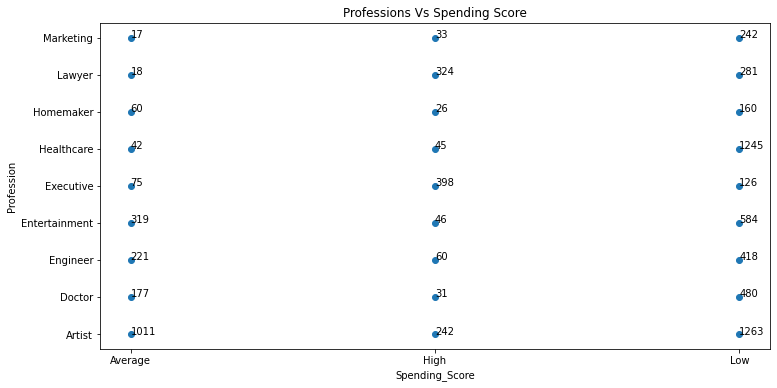

In [22]:
colors = ['yellow' , 'red', 'green']
plt.scatter(Spend_score['Spending_Score'], Spend_score['Profession'])
plt.xlabel('Spending_Score')
plt.ylabel('Profession')
plt.title("Professions Vs Spending Score")
for i, label in enumerate(Spend_score.Records):
    plt.annotate(label, (Spend_score['Spending_Score'][i], Spend_score['Profession'][i]))

In [ ]:
profEd = df.groupby(['Profession', 'Graduated']).size().reset_index().rename(columns={0:'Records'})

In [ ]:
profEd

,Profession,Graduated,Records
0,Artist,No,293
1,Artist,Yes,2209
2,Doctor,No,288
3,Doctor,Yes,395
4,Engineer,No,385
5,Engineer,Yes,310
6,Entertainment,No,345
7,Entertainment,Yes,592
8,Executive,No,294
9,Executive,Yes,300


In [ ]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Graduated']= label_encoder.fit_transform(df['Graduated'])
  
df['Graduated'].unique()

array([0, 1, 2])

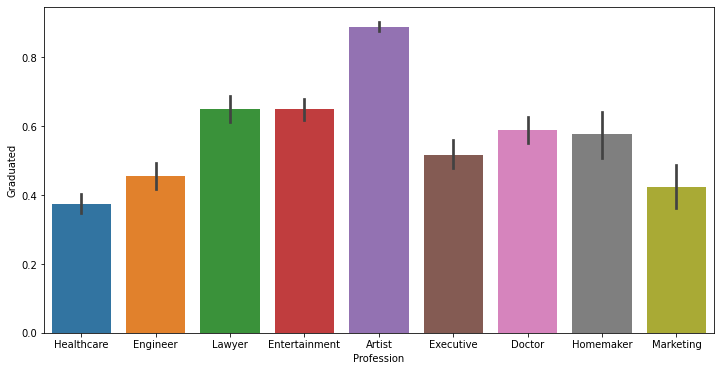

In [ ]:
sns.barplot(x="Profession", y ='Graduated', data = df, )

In [26]:
df.groupby(['Segmentation', 'Spending_Score']).size().reset_index()

,Segmentation,Spending_Score,0
0,A,Average,343
1,A,High,271
2,A,Low,1358
3,B,Average,590
4,B,High,384
5,B,Low,884
6,C,Average,903
7,C,High,405
8,C,Low,662
9,D,Average,138


In [27]:
df['Age'].min()

18

In [28]:
df['Age'].max()

89

In [29]:
bins = [0,25,60,90]
labels = ['Teenagers','Working Population','Senior Citizens']
df['AgeGroup'] = pd.cut(df['Age'],bins=bins,labels=labels,right=False)
print(df.head())

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation            AgeGroup  
0            Low          4.0  Cat_4            D           Teenagers  
1        Average          3.0  Cat_4            A  Working Population  
2            Low          1.0  Cat_6            B     Senior Citizens  
3           High          2.0  Cat_6            B     Senior Citizens  
4           High          6.0  Cat_6            A  Working Population  


In [31]:
df.groupby(['AgeGroup', 'Segmentation']).size()

AgeGroup            Segmentation
Teenagers           A                 25
                    B                 25
                    C                 35
                    D                695
Working Population  A               1589
                    B               1420
                    C               1480
                    D               1367
Senior Citizens     A                358
                    B                413
                    C                455
                    D                206
dtype: int64

In [41]:
df.Segmentation.value_counts().order

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64